### Support Vector Machine - SVM - Classification Implementation for Beginners (using python) - Detailed

1. Introduction to SVM 

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.

In [1]:
# importing dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 3. About the Cancer data
----------------------------------------
Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepositor...] 

Public Source - https://s3-api.us-geo.objectstorage.s...
----------------------------------------

### 4. Load Data From CSV File 
The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [3]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
# Shape of dataset

cell_df.shape

(699, 11)

In [6]:
# how much size the dataframe took to store in memory bytes
cell_df.size

7689

In [7]:
# counts column wise values for each columns

cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [9]:
# counts particular column for particular values 

cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### 5. Distribution of the classes

Data Visualization by plotting a graph

In [10]:
benign_df = cell_df[cell_df['Class']==2][0:200]

In [11]:
print(benign_df)

          ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
355   857774      4         1          1        1            3       1   
362   888169      3         2          2        1            4       3   
363   888523      4         4          4        2            2       3   
364   896404      2         1          1        1            2       1   
365   897172      2         1          1        1            2       1   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2  
1             3         2    1 

In [12]:
malignant_df = cell_df[cell_df['Class']==4][0:200]

In [13]:
print(malignant_df)

          ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
5    1017122      8        10         10        8            7      10   
12   1041801      5         3          3        3            2       3   
14   1044572      8         7          5       10            7       9   
15   1047630      7         4          6        4            6       1   
18   1050670     10         7          7        6            4      10   
..       ...    ...       ...        ...      ...          ...     ...   
491  1119189      5         8          9        4            3      10   
493  1142706      5        10         10       10            6      10   
506  1286943      8        10         10       10            7       5   
514  1306282      6         6          7       10            3      10   
515  1313325      4        10          4        7            3      10   

     BlandChrom  NormNucl  Mit  Class  
5             9         7    1      4  
12            4         4    1 

In [14]:
help(benign_df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

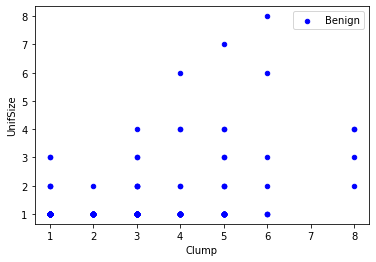

In [25]:
axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

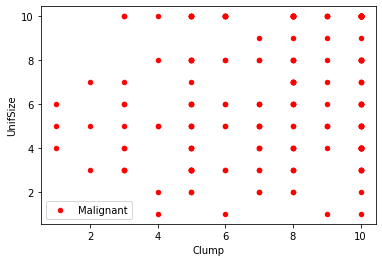

In [24]:
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant')

### 6. Selection of unwanted columns

In [31]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

here column with object type we can't apply mathematical operation on this particular column.

In [32]:
cell_df  = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]

In [33]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [34]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

In [35]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### 7. Remove unwanted columns

In [36]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

[Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

In [46]:
cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize',
       'BareNuc','BlandChrom','NormNucl','Mit']]

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [47]:
feature_df=cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize',
       'BareNuc','BlandChrom','NormNucl','Mit']]

In [48]:
#cell_df 100 rows and 11 columns
#picked 9 columns out of 11


In [54]:
#Independent variable 
X=np.asarray(feature_df)

#dependent variable
Y=np.asarray(cell_df['Class'])
X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [55]:
Y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [56]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


### 8. Divide the data as Train/Test dataset

In [57]:
''' Cell_df --> train (80 rows) / Test (20 rows)
     train(X,Y) ## x itself is a 2D array and 
     test(x,y)  # y is 1D array'''
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print(X.shape,X_train.shape,X_test.shape)

(683, 9) (546, 9) (137, 9)


In [58]:
print(Y.shape,Y_train.shape,Y_test.shape)

(683,) (546,) (137,)


### 9. Modeling (SVM with Scikit-learn)

In [59]:
from sklearn import svm

In [63]:
classifier = svm.SVC(kernel='linear',gamma='auto',C=2) # svc - support vector classifier it is a method ,kernel select the dimension based on hyperplane

In [64]:
classifier.fit(X_train,Y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [65]:
Y_predict = classifier.predict(X_test)

In [66]:
print(Y_predict)

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4]


In [67]:
print(Y_test)

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 2 4 4 2 2 2 4 4 2 2
 2 4 2 2 2 4 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4]


### 10. Evaluation (Results)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

